# ECCO-TCP

In [6]:
import lltk
# lltk.list_opts()

In [7]:
# load corpus
C=lltk.load('ecco_tcp')

In [8]:
# get some basic info
C.info()

[ECCO_TCP]
id: ecco_tcp
desc: ECCO (curated by the Text Creation Partnership)
link: --
public: raw,metadata,freqs,txt,xml


## Install

### From pre-compiled zips

All data types are made available: metadata, XML, TXT, and counts.

In [4]:
# C.download(parts=['metadata','txt','freqs'])

### From sources

This downloads a saved copy of [this official snapshot of ECCO_TCP](https://umich.box.com/s/7dc9b3b0f859a6b36bc2) ([more info](https://textcreationpartnership.org/tcp-texts/ecco-tcp-eighteenth-century-collections-online/)), and then extracts the original XML files into the corpus root's xml folder.

In [5]:
C.compile()

Unzipping raw data archives:  91%|█████████▏| 21/23 [00:03<00:00,  6.37it/s]


NameError: name 'shutil' is not defined

## Preprocess

### Save plain texts

Only necessary if not downloaded pre-compiled.

In [6]:
C.preprocess_txt()

Saving plain text versions of XML files [x1]: 0it [00:00, ?it/s]


In [7]:
# lltk.zeroPunc('Hello, ok')

### Count and save word frequencies

Only necessary if freqs not downloaded.

In [8]:
C.preprocess_freqs()

Mapping save_freqs_json() [x4]: 0it [00:00, ?it/s]


### Compute most frequent words

In [9]:
# Not necessary, will be computed on the fly with separate options
mfw_df = C.preprocess_mfw()
mfw_df

,word,count,fpm,rank
0,the,6758610,63354.948032,1
1,of,4262729,39958.656332,2
2,and,3511540,32917.039778,3
3,to,3148230,29511.385927,4
4,in,2021983,18953.990227,5
...,...,...,...,...
674448,entrykeynge,1,0.009374,674449
674449,rejiciuntur,1,0.009374,674450
674450,archdukeibid,1,0.009374,674451
674451,jejunii,1,0.009374,674452


In [10]:
# Different settings computed on the fly
C.mfw_df(yearbin=10, n=10000, keep_periods=True)

,index,period,word,count,fpm,rank
0,0,1600-1610,the,717,61917.098446,1
1,1,1600-1610,to,436,37651.122625,2
2,2,1600-1610,and,383,33074.265976,3
3,3,1600-1610,of,363,31347.150259,4
4,4,1600-1610,i,244,21070.811744,5
...,...,...,...,...,...,...
111259,1505606,1800-1810,establish'd,1,0.933436,42024
111260,1505648,1800-1810,comforted,1,0.933436,42066
111261,1505880,1800-1810,wondering,1,0.933436,42298
111262,1505893,1800-1810,unthinking,1,0.933436,42311


### Document-term matrix (DTM)

In [11]:
# Not necessary, will be computed on the fly with separate options,
# but this will precompute and cache it for these options
dtm = C.preprocess_dtm()
dtm

,the,of,and,to,in,a,that,i,it,his,...,sluices,urgency,stricken,chops,delinquency,undistinguishing,madding,improvident,hiis,foreboding
id,,,,,,,,,,,,,,,,,,,,,
K051430.000,3084.0,2287.0,1495.0,2085.0,1154.0,1590.0,799.0,277.0,757.0,393.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
K035761.000,81.0,39.0,102.0,65.0,49.0,24.0,15.0,31.0,2.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
K029946.000,633.0,296.0,418.0,255.0,172.0,159.0,83.0,27.0,42.0,142.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
K057527.001,2151.0,1329.0,862.0,937.0,559.0,855.0,453.0,394.0,182.0,608.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
K032085.000,699.0,332.0,210.0,338.0,188.0,141.0,191.0,268.0,127.0,109.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K024779.000,226.0,101.0,154.0,117.0,63.0,46.0,30.0,74.0,18.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
K059123.000,101.0,32.0,42.0,32.0,34.0,9.0,35.0,7.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
K014737.000,749.0,596.0,351.0,385.0,178.0,225.0,183.0,55.0,160.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
dtm_tf = C.dtm(tf=True)
dtm_tf

,the,of,and,to,in,a,that,i,it,his,...,sluices,urgency,stricken,chops,delinquency,undistinguishing,madding,improvident,hiis,foreboding
id,,,,,,,,,,,,,,,,,,,,,
K051430.000,0.000456,0.000537,0.000426,0.000662,0.000571,0.000804,0.000593,0.000248,0.000764,0.000401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
K035761.000,0.000012,0.000009,0.000029,0.000021,0.000024,0.000012,0.000011,0.000028,0.000002,0.000034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
K029946.000,0.000094,0.000069,0.000119,0.000081,0.000085,0.000080,0.000062,0.000024,0.000042,0.000145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
K057527.001,0.000318,0.000312,0.000245,0.000298,0.000276,0.000433,0.000336,0.000353,0.000184,0.000620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
K032085.000,0.000103,0.000078,0.000060,0.000107,0.000093,0.000071,0.000142,0.000240,0.000128,0.000111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K024779.000,0.000033,0.000024,0.000044,0.000037,0.000031,0.000023,0.000022,0.000066,0.000018,0.000031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299
K059123.000,0.000015,0.000008,0.000012,0.000010,0.000017,0.000005,0.000026,0.000006,0.000003,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
K014737.000,0.000111,0.000140,0.000100,0.000122,0.000088,0.000114,0.000136,0.000049,0.000162,0.000047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [13]:
dtm_tfidf = C.dtm(tfidf=True,meta=['author','year'])
dtm_tfidf

,author,year,the,of,and,to,in,a,that,i,...,sluices,urgency,stricken,chops,delinquency,undistinguishing,madding,improvident,hiis,foreboding
id,,,,,,,,,,,,,,,,,,,,,
K051430.000,"Kames, Henry Home, Lord, 1696-1782.",1781,1.278526e-07,2.255238e-07,1.192878e-07,1.855634e-07,2.399066e-07,9.023120e-07,7.489835e-07,3.245381e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
K035761.000,"Amhurst, N. (Nicholas), 1697-1742.",1719,3.357997e-09,3.845837e-09,8.138703e-09,5.784949e-09,1.018668e-08,1.361980e-08,1.406102e-08,3.632015e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
K029946.000,"Thomson, James, 1700-1748.",1748,2.624212e-08,2.918891e-08,3.335272e-08,2.269480e-08,3.575732e-08,9.023120e-08,7.780430e-08,3.163368e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
K057527.001,"Johnstone, Charles, 1719?-1800?",1786,8.917347e-08,1.310543e-07,6.878002e-08,8.339226e-08,1.162113e-07,4.852055e-07,4.246427e-07,4.616174e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
K032085.000,"White, Charles, 1728-1813.",1762,2.897827e-08,3.273892e-08,1.675615e-08,3.008173e-08,3.908358e-08,8.001635e-08,1.790436e-07,3.139936e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K024779.000,"Lennox, Charlotte, ca. 1729-1804.",1758,9.369225e-09,9.959731e-09,1.228785e-08,1.041291e-08,1.309716e-08,2.610462e-08,2.812204e-08,8.669972e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010416
K059123.000,"Williams, Helen Maria, 1762-1827.",1791,4.187132e-09,3.155558e-09,3.351230e-09,2.847975e-09,7.068307e-09,5.107427e-09,3.280904e-08,8.201325e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
K014737.000,"More, Hannah, 1745-1833.",1788,3.105110e-08,5.877227e-08,2.800671e-08,3.426470e-08,3.700466e-08,1.276857e-07,1.715444e-07,6.443898e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [14]:
dtm_tfidf[dtm_tfidf.author.str.startswith("Johnson, S")].mean().drop('year').sort_values(ascending=False).head(10)

samson           0.060970
rambler          0.048940
officiousness    0.034462
exuberance       0.031696
narratives       0.023409
invigorated      0.022919
merriment        0.020514
consonants       0.019624
overpower        0.019224
peevishness      0.018678
dtype: float64

## Examine metadata

In [15]:
C.meta.iloc[0]

author                         Kames, Henry Home, Lord, 1696-1782.
title            Loose hints upon education, chiefly concerning...
year                                                          1781
id_ESTC                                                     T58640
id_DocNo                                               CW104922768
id_TCP                                                 K051430.000
id_GaleDocNo                                          CW3304922768
id_ContentSet                                                 ECSS
id_ImageSetID                                            386401200
extent                                      xi,[1],381,[3]p. ; 8⁰.
pubplace                                               Edinburgh :
publisher          printed for John Bell; and John Murray, London,
date                                                         1781.
notes            <NOTE>Dedication signed: Henry Home.</NOTE><NO...
pubcity                                                  Edinb

### Breakdown by year

In [16]:
# Distribution of years
print(f'Min to max year: {C.metadata.year.min()} to {C.metadata.year.max()}')

Min to max year: 1701 to 1799


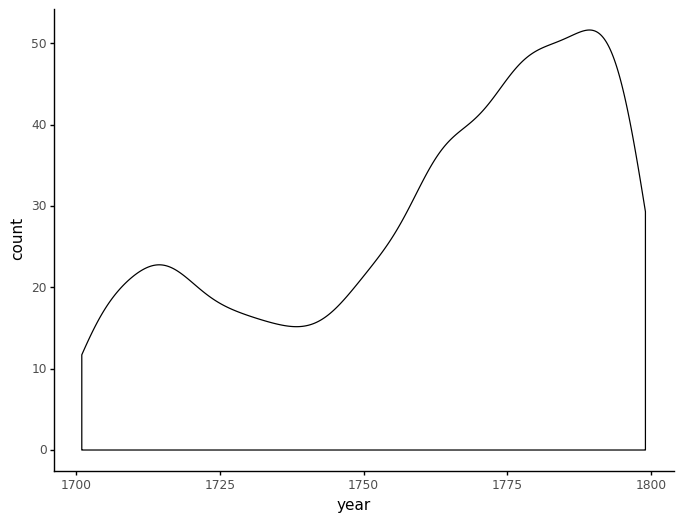

<ggplot: (8758836518537)>

In [17]:
lltk.density(C.metadata, 'year')

In [18]:
# C.metadata.year.plot.hist

### By gender and nationality

In [19]:
# C.metadata_barplot('nation',vertical=True,figsize=(8,6))

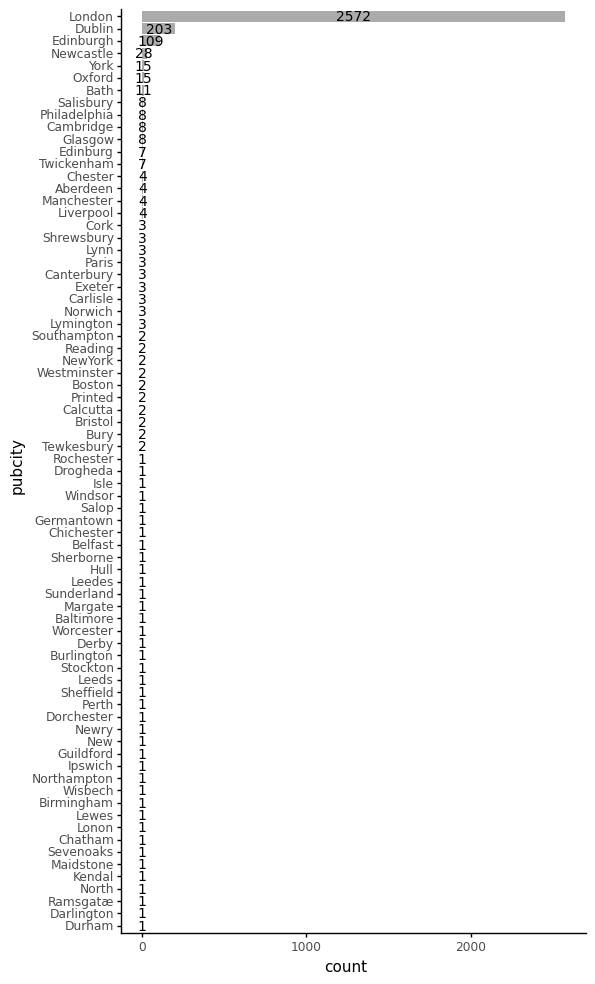

<ggplot: (8758835511945)>

In [20]:
lltk.barplot(C.meta, 'pubcity', vertical=True,figsize=(12,6))